## **3. Data Engineering and Explorative Analysis of the target variable**
In this section, we will be using our existing data frame to engineer features that could help us to predict if a customer is going to return an item or not. As well as explore the relationship between the features and the target variable.

In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette = "Dark2")
import datetime
from scipy.stats import ttest_ind
my_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
  (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]
from itertools import chain, combinations
pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('df_combined.csv')
# length of the known data
k = max(df['order_item_id'])
df

,order_item_id,order_date,delivery_date,item_id,size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,delivery_time,order_id,user_age,user_reg_age
0,1,2012-04-01,2012-04-03,186,s,denim,25,69.90,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,0.0,2,2012-04-01_794,47,342
1,2,2012-04-01,2012-04-03,71,unsized,ocher,21,69.95,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,1.0,2,2012-04-01_794,47,342
2,3,2012-04-01,2012-04-03,71,unsized,curry,21,69.95,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,1.0,2,2012-04-01_794,47,342
3,4,2012-04-02,2012-04-06,22,s,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0.0,4,2012-04-02_808,52,89
4,5,2012-04-02,2012-04-06,151,s,black,53,29.90,825,Mrs,1964-07-11,S-Holstein,2011-02-16,0.0,4,2012-04-02_825,48,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531165,50074,2013-04-29,2013-05-03,2342,s,terracotta,5,69.90,91920,Mrs,1962-03-08,Bayern,2013-04-29,NaN,4,2013-04-29_91920,51,0
531166,50075,2013-04-29,2013-05-03,2505,s,terracotta,5,64.90,91920,Mrs,1962-03-08,Bayern,2013-04-29,NaN,4,2013-04-29_91920,51,0
531167,50076,2013-04-28,2013-05-02,2470,l,white,5,79.90,85095,Mrs,1950-02-14,Berlin,2013-03-24,NaN,4,2013-04-28_85095,63,35
531168,50077,2013-04-28,2013-05-02,2452,m,white,5,59.90,91922,Mrs,1969-11-27,Bburg,2013-04-28,NaN,4,2013-04-28_91922,43,0


### **3.1 Datetime Features** 
We start by creating features describing the order and delivery date, in regard to the date an order is placed or an item is delivered. We will calculate multiple features from these dates, such as day of the week, day of the month, the month of the year, and week of the year.

In [38]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%Y-%m-%d")
df["delivery_date"] = pd.to_datetime(df["delivery_date"], format="%Y-%m-%d")
df["user_dob"] = pd.to_datetime(df["user_dob"], format="%Y-%m-%d")

# Get day of the week for order date and delivery date
df['order_weekday'] = df['order_date'].dt.weekday
df['delivery_weekday'] = df['delivery_date'].dt.weekday

# Get month of the year for order date and delivery date
df['order_month'] = df['order_date'].dt.month
df['delivery_month'] = df['delivery_date'].dt.month

# Get day of the month for order date and delivery date
df['order_day'] = df['order_date'].dt.day
df['delivery_day'] = df['delivery_date'].dt.day

# Get week of the year for order date and delivery date
df['order_week'] = df['order_date'].dt.week
df['delivery_week'] = df['delivery_date'].dt.week


In [5]:
df

,order_item_id,order_date,delivery_date,item_id,size,item_color,brand_id,item_price,user_id,user_title,...,user_age,user_reg_age,order_weekday,delivery_weekday,order_month,delivery_month,order_day,delivery_day,order_week,delivery_week
0,1,2012-04-01,2012-04-03,186,s,denim,25,69.90,794,Mrs,...,47,342,6,1,4,4,1,3,13,14
1,2,2012-04-01,2012-04-03,71,unsized,ocher,21,69.95,794,Mrs,...,47,342,6,1,4,4,1,3,13,14
2,3,2012-04-01,2012-04-03,71,unsized,curry,21,69.95,794,Mrs,...,47,342,6,1,4,4,1,3,13,14
3,4,2012-04-02,2012-04-06,22,s,green,14,39.90,808,Mrs,...,52,89,0,4,4,4,2,6,14,14
4,5,2012-04-02,2012-04-06,151,s,black,53,29.90,825,Mrs,...,48,411,0,4,4,4,2,6,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531165,50074,2013-04-29,2013-05-03,2342,s,terracotta,5,69.90,91920,Mrs,...,51,0,0,4,4,5,29,3,18,18
531166,50075,2013-04-29,2013-05-03,2505,s,terracotta,5,64.90,91920,Mrs,...,51,0,0,4,4,5,29,3,18,18
531167,50076,2013-04-28,2013-05-02,2470,l,white,5,79.90,85095,Mrs,...,63,35,6,3,4,5,28,2,17,18
531168,50077,2013-04-28,2013-05-02,2452,m,white,5,59.90,91922,Mrs,...,43,0,6,3,4,5,28,2,17,18


In [39]:
# set delivery date to datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
delivery_date_dict = df["delivery_date"].value_counts().to_dict()
delivery_date_frame = pd.DataFrame(delivery_date_dict.items(), columns=['delivery_date', 'count'])
# sort values per date
delivery_date_frame = delivery_date_frame.sort_values(by='delivery_date')
delivery_date_frame


,delivery_date,count
304,2012-04-03,204
286,2012-04-04,430
250,2012-04-05,995
209,2012-04-06,1230
388,2012-04-07,89
...,...,...
437,2013-07-17,28
441,2013-07-18,18
440,2013-07-19,19
297,2013-07-22,267


### **3.2 Define useful functions**
We define a couple of useful functions which will give us help us in determining the return rate of a categorical or integer feature, as well as creating a graphical representation of the data.

In [8]:
# Define a function to get the return rate of a given categorical column
def get_return_rate(df:dict, column:str, sort:bool) -> dict:
    """
    Calculate the return rate of a given categorical column.

    Parameters
    ----------
    df : dict
        Dataframe to be used.
    column : str
        column to be used.

    Returns
    -------
    dict
        All categories and their return rate and not-return rate.
    """    
    return_rate = df[['return', column]].groupby([column]).count()
    return_rate.rename(columns={'return': 'count'}, inplace=True)
    return_rate["Returned"] = df[['return', column]].groupby([column]).mean()
    return_rate["Not-Returned"] = abs(return_rate["Returned"] - 1)
    

    if sort:
        return_rate.sort_values(by=['count'], ascending=False, inplace=True)
    return_rate.drop(['count'], axis=1, inplace=True)
    return return_rate

# Example with the column size
size_return_rate = get_return_rate(df.iloc[0:k], 'size',True)
size_return_rate

,Returned,Not-Returned
size,,
s,0.498293,0.501707
m,0.504160,0.495840
l,0.484930,0.515070
unsized,0.410574,0.589426
xs,0.497458,0.502542
xl,0.466682,0.533318
xxl,0.537371,0.462629
xxxl,0.352067,0.647933


<Figure size 432x288 with 0 Axes>

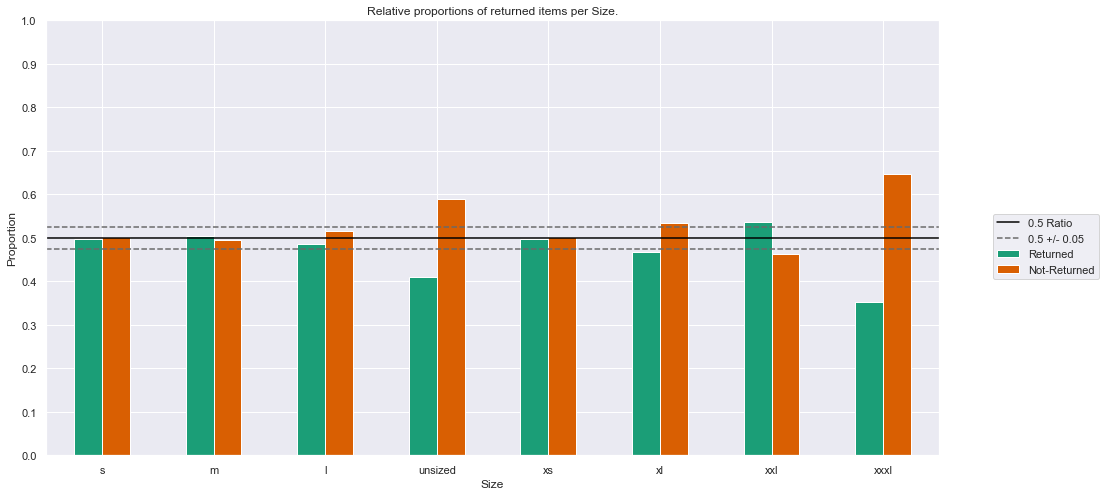

In [12]:
# Define a function to create a barplot of the return rate for categorical features
def create_barplot(feature_return_rate :dict, x_y:tuple , color:list, r:int , name:str) -> object:
    """
    Create a barplot of the return rate for categorical features.

    Parameters
    ----------
    feature_return_rate : dict
        Dataframe which contains the return rate for each category.
    x_y : tuple
        Size of the plot.
    color : list
        Color palette for the plot.
    r : int
        Degrees to rotate the x-axis labels.
    name : str
        Name of the plot.

    Returns
    -------
    object
        Barplot of the return rate for each category.
    """    
    plot = plt.figure()
    plot = feature_return_rate.plot(kind='bar', stacked = False, figsize = x_y, title = "Relative proportions of returned items per %s." % name,
                xlabel = name, ylabel = "Proportion", yticks = np.arange(0, 1.1, step = 0.1), color = my_colors)

    plt.xticks(rotation=r)
    plot.axhline(y = .5, color = "black", label = "0.5 Ratio")
    plot.axhline(y = 0.525, color = "dimgrey", linestyle = "--")
    plot.axhline(y = 0.475, color = "dimgrey", linestyle = "--", label = "0.5 +/- 0.05")
    plt.legend(loc = "center", bbox_to_anchor = (0.87, 0.23,  0.5, 0.5))
    plt.show()
create_barplot(size_return_rate,(16,8) ,my_colors ,0, "Size")

In [10]:
# Define function to create a box plot of returned items vs non-returned items for numerical features
def create_boxplot(df:dict, x_y:tuple, column:str, name:str, xl:list) -> object:
    """
    Create a box plot of returned items vs non-returned items for numerical features.

    Parameters
    ----------
    df : dict
        Dataframe to be used.
    x_y : tuple
        Size of the plot.
    column : str
        Column to be used.
    name : str
        Name of the plot.
    xl : list
        Limits of the x-axis.

    Returns
    -------
    object
        Boxplot of returned items vs non-returned items for numerical features.
    """    
    plt.figure(figsize= x_y)
    plot = sns.boxplot(data = df[[column,"return"]], x = column, y = "return", orient = "h",showfliers = False)
    plot.set(xlabel = name, ylabel = "Return", title = "Boxplot of %s grouped by return" % name)
    plt.xlim(xl[0], xl[1])
    plt.show()

The barplot gives us a visual representation of the return rate for different sizes ordered by the number of sales. The size **s**, **m**, and **l** seem to be not so indicative if an item is going to be returned or not, whereas **unsized**, **xs**, **xl** and especially **xxl** seem to be more indicative. The size **xxl** is the only size that has a higher return rate than the other sizes.

### **3.3 Explore categorical features**

<Figure size 432x288 with 0 Axes>

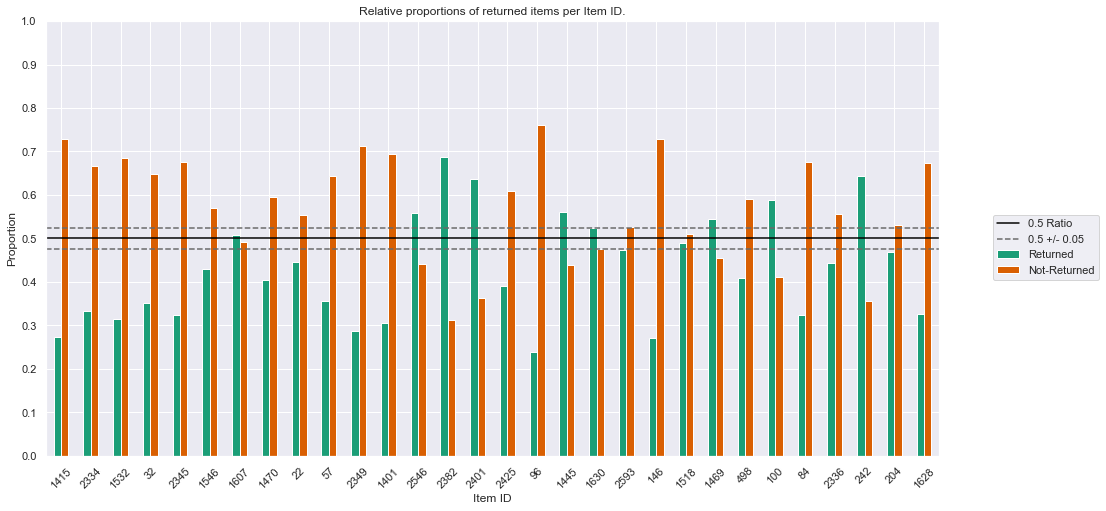

In [16]:
item_id_return_rate = get_return_rate(df.iloc[0:k], 'item_id',True)
item_id_return_rate
create_barplot(item_id_return_rate[:30], (16,8) ,my_colors,45, "Item ID")

Judging from the barplot, we can say that the different items have a varying degree of their return rate, which means that item id is a potentially good feature to use.

<Figure size 432x288 with 0 Axes>

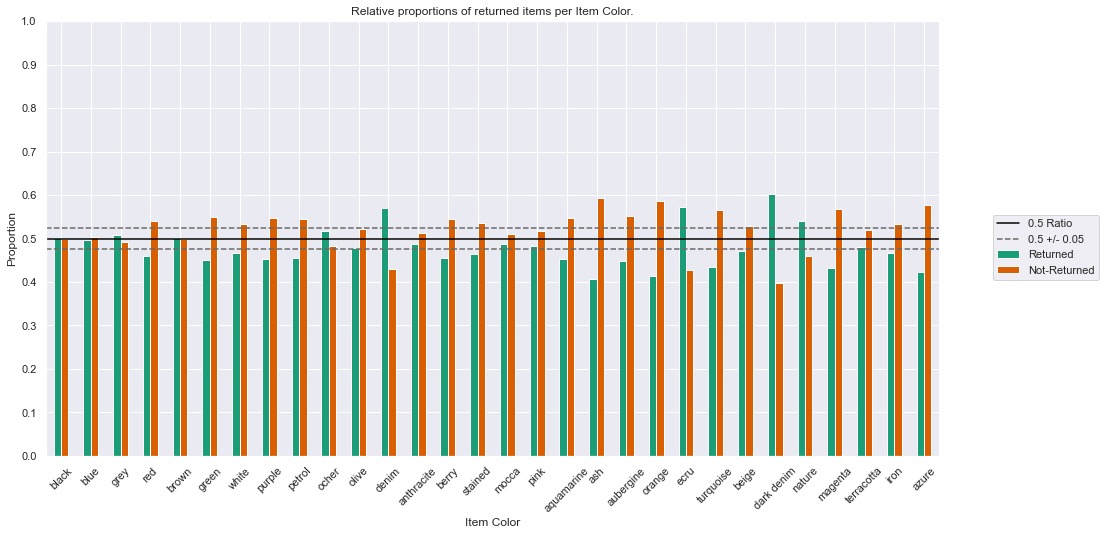

In [18]:
item_color_return_rate = get_return_rate(df.iloc[0:k], 'item_color',True)
create_barplot(item_color_return_rate[:30], (16,8) ,my_colors,45, "Item Color")

While the difference between the return rate of the different colors is not that big, there are still quite a few colors with high variability in their return rate. Especially the color **pallid** seems to have the biggest difference in its return rate.

<Figure size 432x288 with 0 Axes>

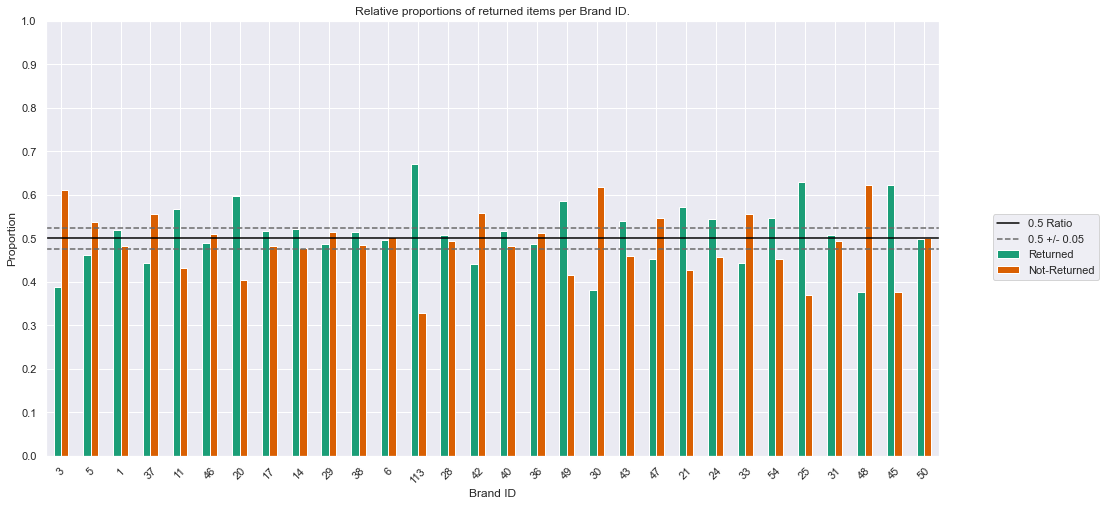

In [19]:
brand_id_return_rate = get_return_rate(df.iloc[0:k], 'brand_id',True)
create_barplot(brand_id_return_rate[:30], (16,8) ,my_colors,45,"Brand ID")

Different brands seem to also have varying degrees in their return rates.

<Figure size 432x288 with 0 Axes>

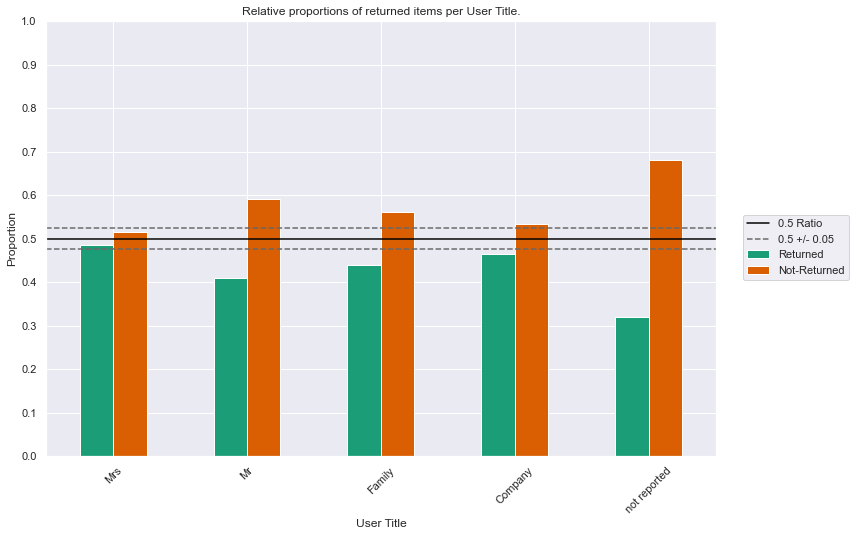

In [22]:
user_title_return_rate = get_return_rate(df.iloc[0:k], 'user_title',True)
create_barplot(user_title_return_rate[:30], (12,8) ,my_colors,45, "User Title")

<Figure size 432x288 with 0 Axes>

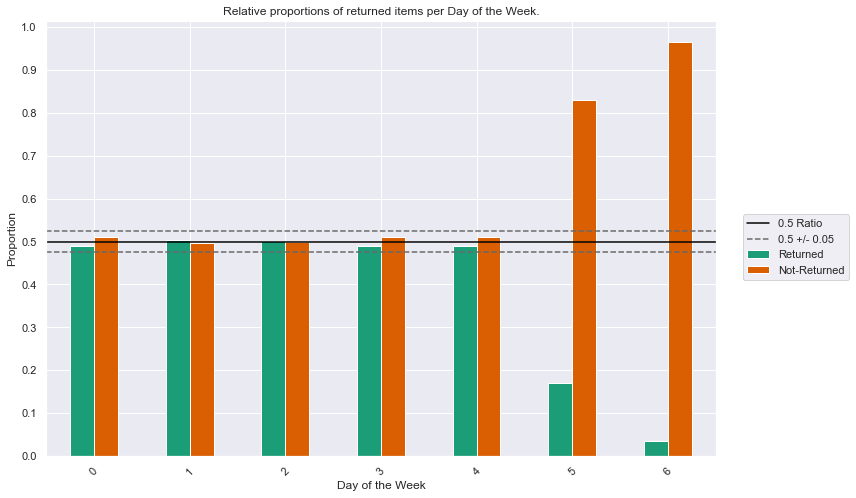

In [24]:
order_weekday_return_rate = get_return_rate(df.iloc[0:k], "delivery_weekday",False)
create_barplot(order_weekday_return_rate[:30], (12,8) ,my_colors,45, "Day of the Week")

In [18]:
df["delivery_weekday"].value_counts()

1    120698
2    106583
0    104636
3     97526
4     84542
5      9533
6      7652
Name: delivery_weekday, dtype: int64

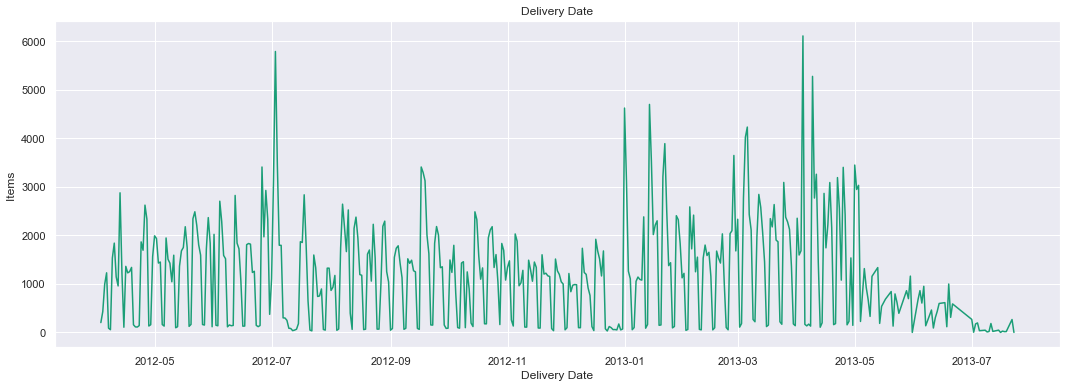

In [22]:
# Line chart of delivery_date using sns
plt.figure(figsize=(18, 6))
plot = sns.lineplot(x='delivery_date', y='count', data=delivery_date_frame, color=my_colors[0])
plot.set(xlabel='Delivery Date', ylabel='Items ', title='Delivery Date')
plt.show()

It seems that there are days in which products get rarely delivered, which can be seen on both the line chart and through seeing the value counts of the column **delivery_weekday**. One of the reasons could be that the online retailer sends packages only on specific days of the week, or uses a delivery company that operates only on certain days of the week.

### **3.4 Explore numerical features**

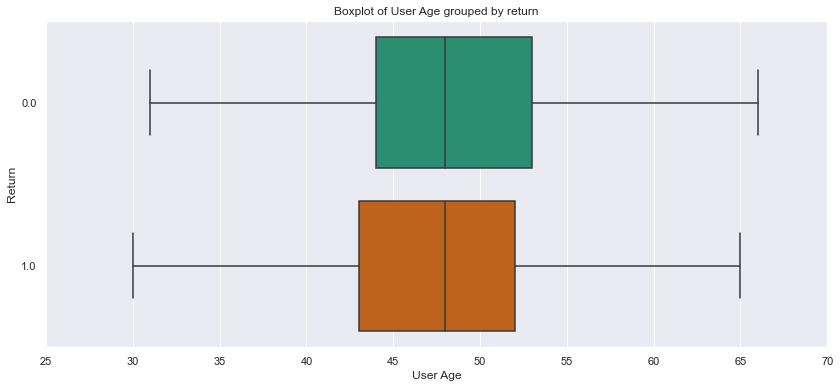

In [25]:
create_boxplot(df.iloc[0:k], (14,6), "user_age", "User Age", (25,70))

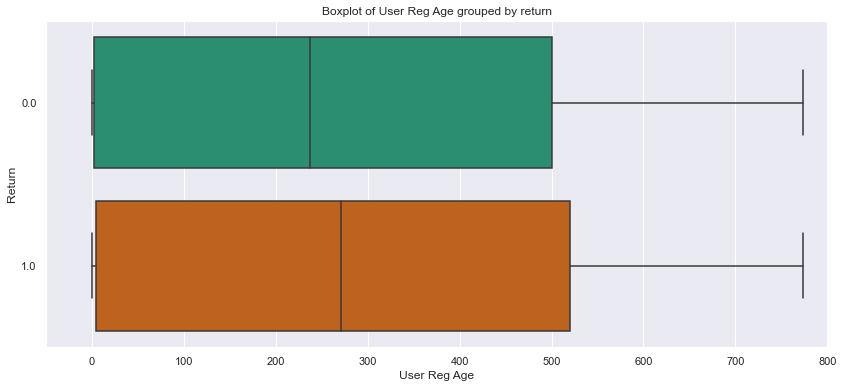

In [26]:
user_age = create_boxplot(df.iloc[0:k], (14,6), "user_reg_age", "User Reg Age", (-50,800))

### **3.5 Order Id Features**
In the previous notebook, we derived the order id feature by combining the order id and the item id. This feature in its raw state is not useful for us, but we can use it to get information about the specific order of a customer such as the number of items in the order or the total price of the order.

In [40]:
# Get number of items per order
df_group = df[["order_id","order_date"]].groupby("order_id").count().rename(columns={"order_date":"order_item_count"})
df = pd.merge(df, df_group, on = "order_id", how = "left")

# Get total price per order
df_group = df[["order_id","item_price"]].groupby("order_id").sum().rename(columns={"item_price":"order_sum"})
df = pd.merge(df, df_group, on = "order_id", how = "left")

# Get average item price per order
df["average_item_price_order"] = df["order_sum"]/df["order_item_count"]
df["average_item_price_order"] = round(df["average_item_price_order"],2)
df

,order_item_id,order_date,delivery_date,item_id,size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,delivery_time,order_id,user_age,user_reg_age,order_weekday,delivery_weekday,order_month,delivery_month,order_day,delivery_day,order_week,delivery_week,order_item_count,order_sum,average_item_price_order
0,1,2012-04-01,2012-04-03,186,s,denim,25,69.90,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,0.0,2,2012-04-01_794,47,342,6,1,4,4,1,3,13,14,3,209.8,69.93
1,2,2012-04-01,2012-04-03,71,unsized,ocher,21,69.95,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,1.0,2,2012-04-01_794,47,342,6,1,4,4,1,3,13,14,3,209.8,69.93
2,3,2012-04-01,2012-04-03,71,unsized,curry,21,69.95,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,1.0,2,2012-04-01_794,47,342,6,1,4,4,1,3,13,14,3,209.8,69.93
3,4,2012-04-02,2012-04-06,22,s,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0.0,4,2012-04-02_808,52,89,0,4,4,4,2,6,14,14,1,39.9,39.90
4,5,2012-04-02,2012-04-06,151,s,black,53,29.90,825,Mrs,1964-07-11,S-Holstein,2011-02-16,0.0,4,2012-04-02_825,48,411,0,4,4,4,2,6,14,14,3,249.7,83.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531165,50074,2013-04-29,2013-05-03,2342,s,terracotta,5,69.90,91920,Mrs,1962-03-08,Bayern,2013-04-29,NaN,4,2013-04-29_91920,51,0,0,4,4,5,29,3,18,18,9,748.2,83.13
531166,50075,2013-04-29,2013-05-03,2505,s,terracotta,5,64.90,91920,Mrs,1962-03-08,Bayern,2013-04-29,NaN,4,2013-04-29_91920,51,0,0,4,4,5,29,3,18,18,9,748.2,83.13
531167,50076,2013-04-28,2013-05-02,2470,l,white,5,79.90,85095,Mrs,1950-02-14,Berlin,2013-03-24,NaN,4,2013-04-28_85095,63,35,6,3,4,5,28,2,17,18,1,79.9,79.90
531168,50077,2013-04-28,2013-05-02,2452,m,white,5,59.90,91922,Mrs,1969-11-27,Bburg,2013-04-28,NaN,4,2013-04-28_91922,43,0,6,3,4,5,28,2,17,18,2,119.8,59.90


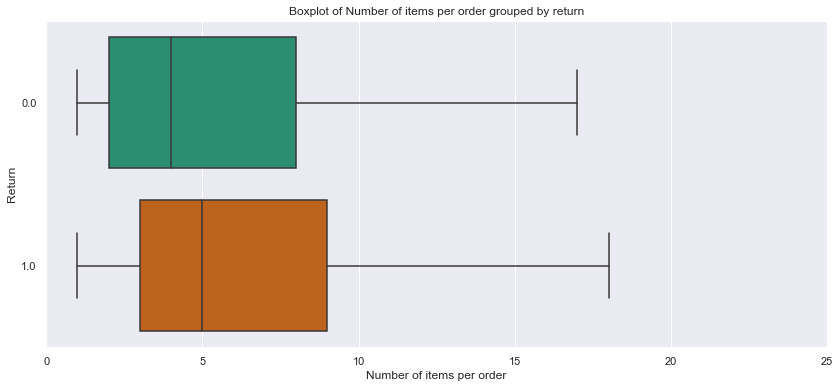

In [28]:
create_boxplot(df.iloc[0:k], (14,6), "order_item_count", "Number of items per order", (0,25))

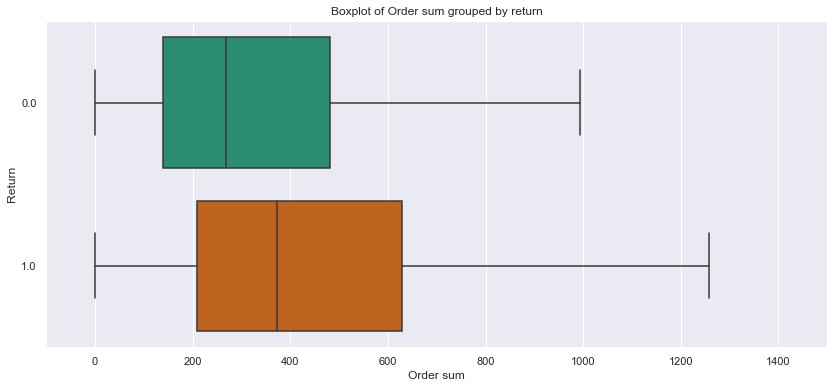

In [29]:
create_boxplot(df.iloc[0:k], (14,6), "order_sum", "Order sum", (-100,1500))

From the box plots, we can derive that both the number of items and the total price of the order are positively correlated with the return rate.

### **3.6 Same items in the order**
Using the order_id we can derive a number of features that gives us the number of the same items in regard to one or more categorical features, such as the number of items that have the same color, or the number of items that have the same brand or size. We will be using the python **itertools** library to create a list of all the combinations of the categorical features.


In [41]:
item_descriptions = ["item_id","size","item_color","brand_id"]
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))

In [42]:
categorical_powerset = powerset(item_descriptions)
# Use the powerset to create new columns indicating the number of the same items in the order
powerset_name_list = []
# exclude powerset elements containing both item_id and brand_id as they are redundant
exclude = ["item_id","brand_id"]
for column in categorical_powerset:
    current = list(column)
    if not all(x in current for x in exclude):
        print(current)
        name = "order_number_same_" + "_".join(current)
        name_different = "order_number_different_" + "_".join(current)
        powerset_name_list += [name]
        df_group = df[current + ["order_id","user_title"]].groupby(["order_id"] + current).count().rename(columns={"user_title":name})
        df = pd.merge(df, df_group, on = current + ["order_id"], how = "left")
        # Get number of different items in the order
        df[name_different] = df["order_item_count"] - df[name] 
        # df[name] = df[name] - 1
df

['item_id']
['size']
['item_color']
['brand_id']
['item_id', 'size']
['item_id', 'item_color']
['size', 'item_color']
['size', 'brand_id']
['item_color', 'brand_id']
['item_id', 'size', 'item_color']
['size', 'item_color', 'brand_id']


,order_item_id,order_date,delivery_date,item_id,size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,delivery_time,order_id,user_age,user_reg_age,order_weekday,delivery_weekday,order_month,delivery_month,order_day,delivery_day,order_week,delivery_week,order_item_count,order_sum,average_item_price_order,order_number_same_item_id,order_number_different_item_id,order_number_same_size,order_number_different_size,order_number_same_item_color,order_number_different_item_color,order_number_same_brand_id,order_number_different_brand_id,order_number_same_item_id_size,order_number_different_item_id_size,order_number_same_item_id_item_color,order_number_different_item_id_item_color,order_number_same_size_item_color,order_number_different_size_item_color,order_number_same_size_brand_id,order_number_different_size_brand_id,order_number_same_item_color_brand_id,order_number_different_item_color_brand_id,order_number_same_item_id_size_item_color,order_number_different_item_id_size_item_color,order_number_same_size_item_color_brand_id,order_number_different_size_item_color_brand_id
0,1,2012-04-01,2012-04-03,186,s,denim,25,69.90,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,0.0,2,2012-04-01_794,47,342,6,1,4,4,1,3,13,14,3,209.8,69.93,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2
1,2,2012-04-01,2012-04-03,71,unsized,ocher,21,69.95,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,1.0,2,2012-04-01_794,47,342,6,1,4,4,1,3,13,14,3,209.8,69.93,2,1,2,1,1,2,2,1,2,1,1,2,1,2,2,1,1,2,1,2,1,2
2,3,2012-04-01,2012-04-03,71,unsized,curry,21,69.95,794,Mrs,1965-01-06,Bad-Wue,2011-04-25,1.0,2,2012-04-01_794,47,342,6,1,4,4,1,3,13,14,3,209.8,69.93,2,1,2,1,1,2,2,1,2,1,1,2,1,2,2,1,1,2,1,2,1,2
3,4,2012-04-02,2012-04-06,22,s,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0.0,4,2012-04-02_808,52,89,0,4,4,4,2,6,14,14,1,39.9,39.90,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,5,2012-04-02,2012-04-06,151,s,black,53,29.90,825,Mrs,1964-07-11,S-Holstein,2011-02-16,0.0,4,2012-04-02_825,48,411,0,4,4,4,2,6,14,14,3,249.7,83.23,1,2,2,1,2,1,1,2,1,2,1,2,2,1,1,2,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531165,50074,2013-04-29,2013-05-03,2342,s,terracotta,5,69.90,91920,Mrs,1962-03-08,Bayern,2013-04-29,NaN,4,2013-04-29_91920,51,0,0,4,4,5,29,3,18,18,9,748.2,83.13,1,8,5,4,3,6,4,5,1,8,1,8,3,6,4,5,3,6,1,8,3,6
531166,50075,2013-04-29,2013-05-03,2505,s,terracotta,5,64.90,91920,Mrs,1962-03-08,Bayern,2013-04-29,NaN,4,2013-04-29_91920,51,0,0,4,4,5,29,3,18,18,9,748.2,83.13,2,7,5,4,3,6,4,5,2,7,2,7,3,6,4,5,3,6,2,7,3,6
531167,50076,2013-04-28,2013-05-02,2470,l,white,5,79.90,85095,Mrs,1950-02-14,Berlin,2013-03-24,NaN,4,2013-04-28_85095,63,35,6,3,4,5,28,2,17,18,1,79.9,79.90,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
531168,50077,2013-04-28,2013-05-02,2452,m,white,5,59.90,91922,Mrs,1969-11-27,Bburg,2013-04-28,NaN,4,2013-04-28_91922,43,0,6,3,4,5,28,2,17,18,2,119.8,59.90,2,0,2,0,1,1,2,0,2,0,1,1,1,1,2,0,1,1,1,1,1,1


In [52]:
# drop columns we no longer need
# columns_to_drop = ["order_item_id","delivery_date","order_date","user_dob", "user_reg_date"]
# df.drop(columns_to_drop, axis = 1, inplace = True)

In [43]:

# save to csv
df.to_csv("df_processed.csv", index = False)